jupyter notebook——sklearn机器学习
---
[吴恩达机器学习系列]https://www.bilibili.com/video/BV1pZ4y1v7Cf?p=9&spm_id_from=333.1007.top_right_bar_window_history.content.click

生成操作数据存储指定列标签输出pd输出

数据 (99, 3)


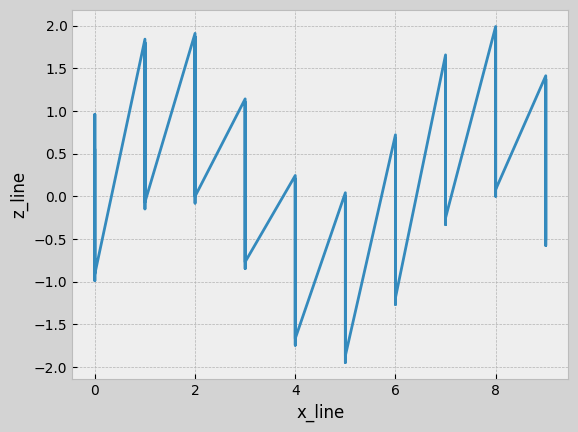

前五行切片：    x_line  y_line    z_line
0       0       1  0.540302
1       0       2 -0.416147
2       0       3 -0.989992
3       0       4 -0.653644
4       0       5  0.283662
输出z列数据: 0     0.540302
1    -0.416147
2    -0.989992
3    -0.653644
4     0.283662
5     0.960170
6     0.753902
7    -0.145500
8    -0.911130
9     1.841471
10    1.381773
11    0.425324
12   -0.148522
13    0.187827
14    1.125133
15    1.801641
16    1.595373
17    0.695971
18   -0.069659
19    1.909297
20    1.449600
21    0.493151
22   -0.080695
23    0.255654
24    1.192960
25    1.869468
26    1.663200
27    0.763797
28   -0.001833
29    1.141120
30    0.681422
31   -0.275027
32   -0.848872
33   -0.512524
34    0.424782
35    1.101290
36    0.895022
37   -0.004380
38   -0.770010
39    0.243198
40   -0.216500
41   -1.172949
42   -1.746795
43   -1.410446
44   -0.473140
45    0.203368
46   -0.002900
47   -0.902303
48   -1.667933
49    0.041076
50   -0.418622
51   -1.375071
52   -1.948917
53   -1.612568
54   -0

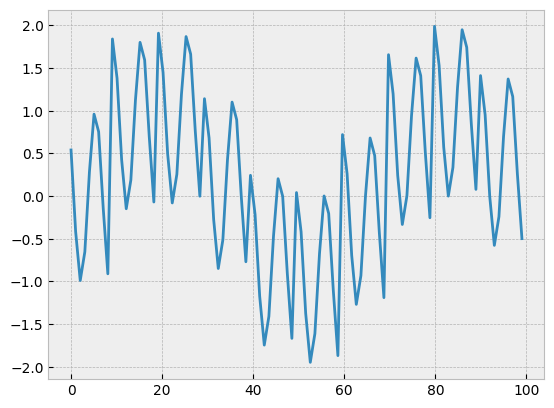

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.fft import fft

plt.style.use('bmh')
with open('D:\code\Python Code/data/temp/test1.csv','w+') as f1:
    x=np.arange(0,10)
    y=np.arange(0,10)
    for i in x:
        for j in y:
            z=np.sin(i)+np.cos(j)
            print(i,j,z,file=f1,sep=',')
#读取数据
data1=pd.read_csv('D:\code\Python Code/data/temp/test1.csv')
data1.columns=['x_line','y_line','z_line']#指定列标签
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
with open('D:\code\Python Code/data/temp/test2.csv','w+') as f2:
        data1.to_csv(f2,sep=',',header=False, encoding='utf_8_sig', index=False)
print('数据',data1.shape)

'''
print(data1['x_line'])
print(data1['y_line'])
print(data1['z_line'])
'''
fig,ax=plt.subplots(facecolor='lightgrey')
ax.plot(data1['x_line'],data1['z_line'])#输出列数据
ax.set_xlabel('x_line')
ax.set_ylabel('z_line')

plt.show()
#数据切片输出,按照索引和标签输出
print('前五行切片：',data1[:5])#输出行切片
print('输出z列数据:',data1['z_line'])

data2=data1[:5]#先输出前五行，再输出z_line标签数据
print('z列前五个数据:',data2['z_line'])

a=np.linspace(0,99,99)
plt.plot(a,data1['z_line'])
plt.show()

1.线性回归(linear regression)

[[1], [3], [5], [7], [9]]
score: 0.7112903225806451
coefficient: [[1.05]]
intercept: [2.75]
y=[[1.05]]x+[2.75]
predicted: [[4.85]]


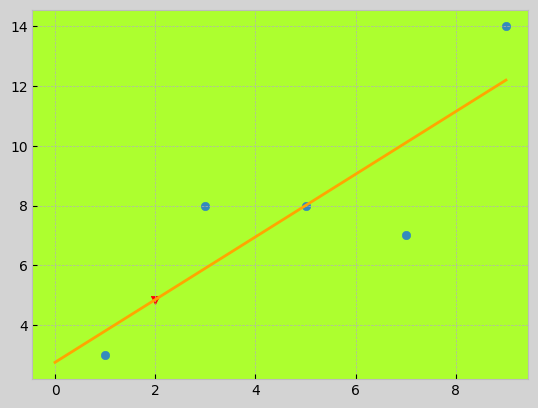

In [4]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
#原始数据输入
array1=[[1],[3],[5],[7],[9]]#新版sklearn需要传入二维数组，每个特征分开输入
#多行一列数据，每一行即为一个属性
x_train=array1
print(x_train)
#目标数据
array2=[[3],[8],[8],[7],[14]]
y_train=array2
#测试数据
array3=[[2]]

x_test=np.array(array3).reshape(1,-1)
#数据进行拟合
linear=linear_model.LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_train,y_train)
print('score:',linear.score(x_train,y_train))
print('coefficient:',linear.coef_)#系数
print('intercept:',linear.intercept_)#截距
print(f'y={linear.coef_}x+{linear.intercept_}')
#预测数据输入值
predicted=linear.predict(x_test)
print('predicted:',predicted)

#绘制图像
fig,ax=plt.subplots(facecolor='lightgrey')
ax.scatter(array1,array2)
ax.scatter(array3,predicted,color='red',marker='v')

#显示线性拟合图像
x1=np.arange(0,10)
x=np.array(x1).reshape(-1,1)
y=linear.coef_*x+linear.intercept_
ax.plot(x,y,color='orange')
ax.patch.set_facecolor('greenyellow')
plt.show()

2.逻辑回归(logistic regression)判断是非

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
Coefficient: 
 [[0.33835552]]
Intercept: 
 [-1.52259751]
[0 0 0 1 1 1]


d:\Program Files\PYTHON PROGRAM3.10.8\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


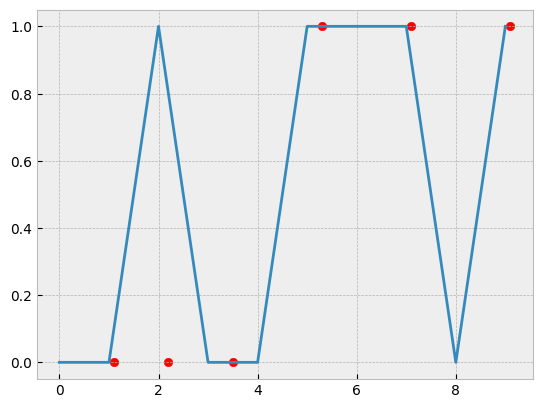

In [5]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset

# Create logistic regression object

model = LogisticRegression()

# Train the model using the training sets and check score
x=np.arange(0,10,1).reshape(-1,1)
y=[[0],[0],[1],[0],[0],[1],[1],[1],[0],[1]]
print(x)
model.fit(x, y)
model.score(x, y)
x_test=[[1.1],[2.2],[3.5],[5.3],[7.1],[9.1]]
#Equation coefficient and Intercept
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
#Predict Output
predicted= model.predict(x_test)
print(predicted)

plt.plot(x,y)
plt.scatter(x_test,predicted,color='red',label='predict')
plt.show()

鸢(yuan)尾花(物种分类)KNeighborsClassifier

keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
特征（列表） ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
数据特征(150,4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
标签大小： (150,)
名称： ['setosa' 'versicolor' 'virginica']
全部示例： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
打乱后数据： [1 1 0 2 0 1 2 2 0 0 0 2 1 0 1 1 0 0 1 0 0 1 1 2 1 1 0 1 0 0 2 0 0 2 2 2 1
 1 2 0 1 1 1 2 0 0 1 2 1 1 0 0 1 1 1 1 2 1 2 1 2 1 0 2 0 0 1 2 0 2 2 0 0 1
 0 1 1 2 0 1 0 1 1 0 2 2 1 1 1 0 2 0 2 0 0 2 1 2 0 0 1 0 1 1 2]
y预测数据: [2 2 0 2 2 1 0 1 2 2 0 0 1 0 0 2 0 2 0 0 2 1 1 2 0 2 0 2 0 2 1 2 2 2 0 2 2
 1 1 1 2 2 1 1 1]
原目标

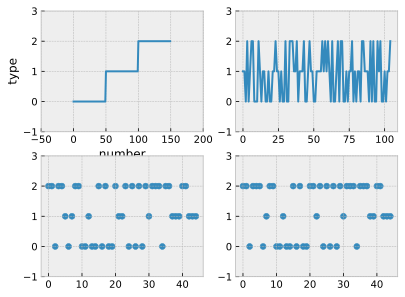

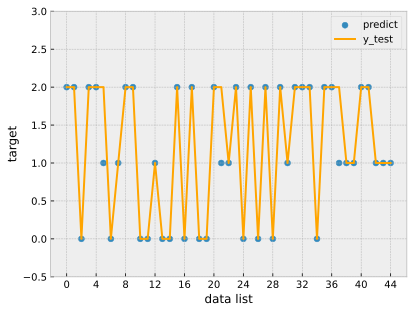

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
%config InlineBackend.figure_format='svg'#设置图片格式
iris=load_iris()
print('keys',iris.keys())#键
print('特征（列表）',iris.feature_names)#特征（列表）

n_samples,n_features=iris.data.shape
print(f'数据特征({n_samples},{n_features})')

print(iris.data[:5])#前五个数据;以列表形式存储array;np.array(data)
print('标签大小：',iris.target.shape)
print('名称：',iris.target_names)
print('全部示例：',iris.target)

iris_x=iris.data
iris_y=iris.target

X_train,X_test,y_train,y_test=train_test_split(iris_x,iris_y,test_size=0.3)#将数据分开为训练数据与预测数据

print('打乱后数据：',y_train)

knn=KNeighborsClassifier()#分类器缩写
knn.fit(X_train,y_train)#训练数据(估计器，拟合)

print('y预测数据:',knn.predict(X_test))#输出预测数据结果//与y_test比较
print('原目标：',y_test)


import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
plt.style.use('bmh')
x=np.arange(0,150)
fig,axs=plt.subplots(2,2)
fig.subplots_adjust(hspace=0.2)

axs[0,0].plot(x,iris.target,)
axs[0,0].set_xlabel('number');axs[0,0].set_ylabel('type')
axs[0,0].set_ylim(-1,3)
axs[0,0].set_xlim(-50,200)

axs[0,1].plot(np.arange(0,105),y_train);axs[0,1].set_ylim(-1,3)

axs[1,0].scatter(np.arange(0,45),knn.predict(X_test));axs[1,0].set_ylim(-1,3)
axs[1,1].scatter(np.arange(0,45),y_test);axs[1,1].set_ylim(-1,3)

plt.figure('2')#创建新画布
ax=plt.gca()#指定坐标轴；gca就是get current axes的意思
plt.scatter(np.arange(0,45),knn.predict(X_test),label='predict')
plt.plot(np.arange(0,45),y_test,color='orange',label='y_test')
plt.xlabel('data list')
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)#设置坐标轴的刻度缩放

plt.ylabel('target')
plt.ylim(-0.5,3)
plt.legend()
plt.show()

sklearn基本步骤

iris数据维数: (150, 4)
X_train训练数据大小: (120, 3)
X_test维度 (30, 3)
预测数据y_pred大小: (30,)


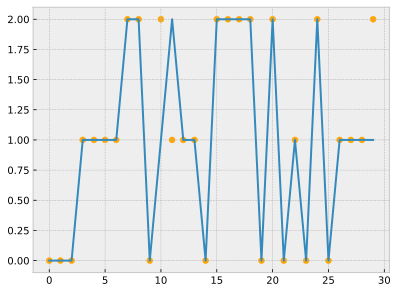

In [7]:
# 导入 sklearn
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
# 加载数据
iris = datasets.load_iris()
print('iris数据维数:',iris.data.shape)
# 划分训练集与测试集
X, y = iris.data[:, :3], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# print(X,y)
# 数据预处理
scaler = preprocessing.StandardScaler().fit(X_train)#标准化
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 创建模型
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# 模型拟合
knn.fit(X_train, y_train)#训练
# print(X_train,y_train)
print('X_train训练数据大小:',X_train.shape)

# 预测
y_pred = knn.predict(X_test)
print('X_test维度',X_test.shape)
# 评估
accuracy_score(y_test, y_pred)
print('预测数据y_pred大小:',y_pred.shape)

plt.plot(np.arange(30),y_test[:])
plt.scatter(np.arange(30),y_pred,color='orange')
plt.show()

csdn
---
[csdn]https://blog.csdn.net/algorithmPro/article/details/103045824

线性回归

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[2.]
0.9999999999999982


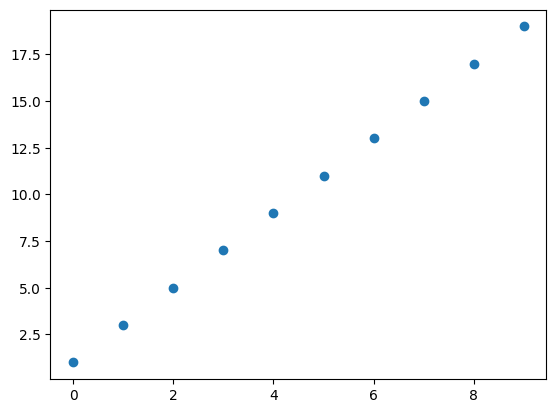

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

model=LinearRegression()
x=np.arange(10)
X=x[:,np.newaxis]#加维数#特征
print(X)
# print(X.shape)
y=2*x+1
plt.scatter(X,y)
model.fit(X,y)
print(model.coef_)#斜率
print(model.intercept_)#截距

K聚类

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.cluster import KMeans
model=KMeans( n_clusters=3,max_iter=500)#簇3/迭代500次
model
X=iris.data[:,0:2]
model.fit(X)
print( model.cluster_centers_,'\n')#簇中心
print(model.labels_,'\n')#聚类后的标签
print(model.inertia_,'\n')#所有点到对应的簇中心的距离平方和 (越小越好)
print(iris.target)#真实标签

[[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2] 

37.05070212765958 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


iris数据中簇分类和真实分类

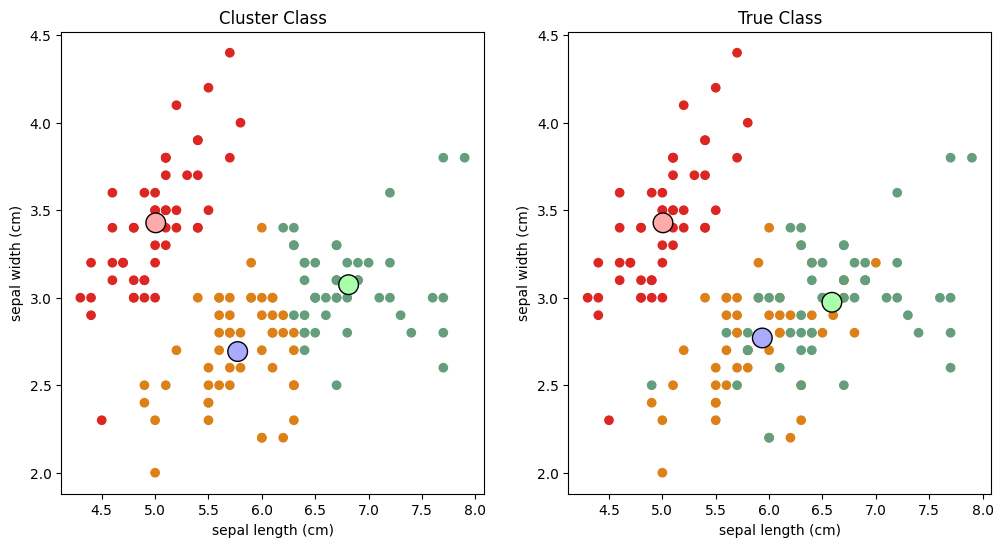

In [5]:
from matplotlib.colors import ListedColormap
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
r_hex = '#dc2624';g_hex = '#649E7D';dt_hex = '#dc8018' 
cmap_bold1=ListedColormap([r_hex,g_hex,dt_hex])
cmap_bold2=ListedColormap([r_hex,dt_hex,g_hex])

centroid=model.cluster_centers_
label=iris.target
true_centroid=np.vstack((X[label==0,:].mean(axis=0),
                            X[label==1,:].mean(axis=0),
                            X[label==2,:].mean(axis=0)))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=model.labels_,cmap=cmap_bold1)#c即color
plt.scatter(centroid[:,0],centroid[:,1],marker='o',s=200,
            edgecolors='k',c=[0,1,2],cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Cluster Class')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=iris.target,cmap=cmap_bold2)
plt.scatter(true_centroid[:,0],true_centroid[:,1],marker='o',s=200,
            edgecolors='k',c=[0,2,1],cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('True Class')
plt.show()

预测器(predicted)

In [8]:
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(iris['data'],iris['target'],test_size=0.2)
print('The size of x_train is ',x_train.shape)
print('The size of y_train is ',y_train.shape)#训练模型
print('The size of x_test is ',x_test.shape)#测试输入数据
print('The size of y_test is ',y_test.shape)#模型结果对比数据

The size of x_train is  (120, 4)
The size of y_train is  (120,)
The size of x_test is  (30, 4)
The size of y_test is  (30,)


In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',multi_class='multinomial')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
p_pred=model.predict_proba(x_test)
print(y_test,'\n')#原本类别
print(y_pred,'\n')#预测出的结果
print(p_pred)#预测类别的信息/概率问题

[1 0 1 2 0 1 0 0 1 0 2 2 0 0 1 1 1 2 0 2 1 1 0 1 1 2 2 2 2 2] 

[1 0 1 2 0 1 0 0 1 0 2 2 0 0 1 1 1 2 0 2 1 1 0 1 2 2 2 2 2 2] 

[[5.83580623e-02 8.78676847e-01 6.29650910e-02]
 [9.67444512e-01 3.25552423e-02 2.45973463e-07]
 [3.04059369e-01 6.93642485e-01 2.29814555e-03]
 [4.24328046e-04 1.47890384e-01 8.51685288e-01]
 [9.64600705e-01 3.53990835e-02 2.11504166e-07]
 [2.09380623e-02 8.94955677e-01 8.41062608e-02]
 [9.69437650e-01 3.05621588e-02 1.91174737e-07]
 [9.85794744e-01 1.42052280e-02 2.78706937e-08]
 [2.99601907e-03 7.57830602e-01 2.39173379e-01]
 [9.86738627e-01 1.32613507e-02 2.18483409e-08]
 [4.38704612e-05 7.27406498e-02 9.27215480e-01]
 [3.33685241e-05 1.59191991e-01 8.40774641e-01]
 [9.76948216e-01 2.30517458e-02 3.80190883e-08]
 [9.91161891e-01 8.83809359e-03 1.51790069e-08]
 [2.74064365e-02 9.17871246e-01 5.47223179e-02]
 [8.13555043e-03 7.80103365e-01 2.11761085e-01]
 [7.57467610e-03 8.95222543e-01 9.72027808e-02]
 [1.59763476e-06 2.86864410e-02 9.71311961e-01]
 [9.8424

预测数据显示为pd数据

In [10]:
import pandas as pd
s=['Class 1 prod','Class 2 prob ','Class 3 prob']
prob_DF=pd.DataFrame(p_pred,columns=s)
prob_DF['Predicted class']=y_pred
prob_DF.head()
#prob_DF.to_csv('site.csv')

,Class 1 prod,Class 2 prob,Class 3 prob,Predicted class
0,0.058358,0.878677,6.296509e-02,1
1,0.967445,0.032555,2.459735e-07,0
2,0.304059,0.693642,2.298146e-03,1
3,0.000424,0.147890,8.516853e-01,2
4,0.964601,0.035399,2.115042e-07,0


score与decision_function

In [14]:
print(model.score(x_test,y_test))#score() 返回的是分类准确率
print(np.sum(y_pred==y_test)/len(y_test))

1.0
1.0


In [15]:
decision_score=model.decision_function(x_test)#decision_function() 返回的是每个样例在每个类下的分数值
print(decision_score)

[[ -2.73027848   2.03115616   0.69912233]
 [  6.14453737   2.95825468  -9.10279205]
 [  0.72437638   2.1511338   -2.87551018]
 [  6.47291732   2.91885409  -9.39177141]
 [  6.91389682   3.05373962  -9.96763644]
 [  6.47883669   3.13629791  -9.6151346 ]
 [ -4.06359625   2.10907651   1.95451974]
 [  6.55262443   3.07116739  -9.62379182]
 [  8.08119599   2.91762109 -10.99881708]
 [ -1.73149417   2.00306581  -0.27157163]
 [  5.96589809   3.14444136  -9.11033945]
 [  6.43284978   3.17203429  -9.60488407]
 [-10.08162959   1.7181117    8.36351789]
 [ -0.94518916   1.76583801  -0.82064885]
 [ -1.41380936   2.0705483   -0.65673894]
 [ -0.1419897    2.25664708  -2.11465738]
 [ -2.36423033   1.68940148   0.67482885]
 [  6.62413265   3.16413743  -9.78827009]
 [ -1.40824395   2.30859091  -0.90034696]
 [ -3.05193422   2.03140276   1.02053146]
 [  7.10793298   3.07441787 -10.18235085]
 [ -7.50368198   2.02988692   5.47379506]
 [  6.62641216   3.00603688  -9.63244904]
 [ -2.95138464   2.42134915   0.53

In [16]:
#每行中最高得分值对应的那一类」作为预测结果
s = ['Class 1 Score', 'Class 2 Score', 'Class 3 Score']	
decision_DF = pd.DataFrame( decision_score, columns=s )	
decision_DF['Predicted Class'] = y_pred	
decision_DF.tail()

,Class 1 Score,Class 2 Score,Class 3 Score,Predicted Class
25,-1.601121,2.010716,-0.409595,1
26,-3.968915,1.220829,2.748085,2
27,-1.571983,2.092292,-0.520309,1
28,-2.066125,2.268296,-0.202171,1
29,6.548300,3.159495,-9.707795,0


k均值

In [17]:
from sklearn.cluster import KMeans
model =KMeans(n_clusters=3)
model.fit(x_train[:,0:2])

KMeans(n_clusters=3)

In [18]:
#inx_pred 和 y_test 给三个类别的索引定义是不同的
index_pred=model.predict(x_test[:,0:2])
print(index_pred)
print(y_test)

[2 1 1 1 1 1 2 1 1 2 1 1 0 2 2 2 2 1 2 2 1 0 1 0 1 2 2 2 2 1]
[1 0 1 0 0 0 1 0 0 1 0 0 2 1 1 1 1 0 1 1 0 2 0 1 0 1 2 1 1 0]


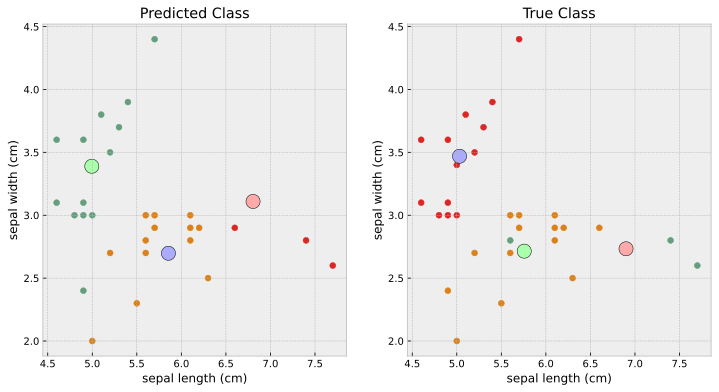

In [19]:
from matplotlib.colors import ListedColormap

cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
r_hex = '#dc2624';g_hex = '#649E7D';dt_hex = '#dc8018' 
cmap_bold1=ListedColormap([r_hex,g_hex,dt_hex])
cmap_bold2=ListedColormap([r_hex,dt_hex,g_hex])

centroid=model.cluster_centers_
#label=iris.target
true_centroid=np.vstack((x_test[y_test==0,0:2].mean(axis=0),
                            x_test[y_test==1,0:2].mean(axis=0),
                            x_test[y_test==2,0:2].mean(axis=0)))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0],x_test[:,1],c=index_pred,cmap=cmap_bold1)#c即color
plt.scatter(centroid[:,0],centroid[:,1],marker='o',s=200,
            edgecolors='k',c=[0,1,2],cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Predicted Class')

plt.subplot(1,2,2)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cmap_bold2)
plt.scatter(true_centroid[:,0],true_centroid[:,1],marker='o',s=200,
            edgecolors='k',c=[2,1,0],cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('True Class')
plt.show()

KMeans 模型里也有 score() 函数，输出的值是它要优化的目标函数的对数

In [20]:
model.score(x_test[:,0:2])

-9.16840474247178

转换器
---
定义：转换器也是一种估计器，两者都带拟合功能，但估计器做完拟合来预测，而转换器做完拟合来转换。

LabelEncoder  的输入是一维，比如 1d ndarray

OrdinalEncoder  的输入是二维，比如 DataFrame

In [21]:
enc = ['win','draw','lose','win']	
dec = ['draw','draw','win']

from sklearn.preprocessing import LabelEncoder	
LE = LabelEncoder()	

print( LE.fit(enc) )	
print( LE.classes_ )	
print( LE.transform(dec))


LabelEncoder()
['draw' 'lose' 'win']
[0 0 2]


In [22]:
from sklearn.preprocessing import OrdinalEncoder	
OE = OrdinalEncoder()	

enc_DF = pd.DataFrame(enc)	
dec_DF = pd.DataFrame(dec)	

print( OE.fit(enc_DF) )	
print( OE.categories_ )	
print( OE.transform(dec_DF) )

OrdinalEncoder()
[array(['draw', 'lose', 'win'], dtype=object)]
[[0.]
 [0.]
 [2.]]


OneHotEncoder(独热编码)

In [23]:
from sklearn.preprocessing import OneHotEncoder	
OHE = OneHotEncoder()	
	
num = LE.fit_transform( enc )	
print( num )	
OHE_y = OHE.fit_transform( num.reshape(-1,1) )	
OHE_y#「稀疏矩阵」形式

OHE_y.toarray()

[2 0 1 2]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

标准化 (standardization)：每个维度的特征减去该特征均值，除以该维度的标准差。

```规范化 (normalization)：每个维度的特征减去该特征最小值，除以该特征的最大值与最小值之差。```

MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
X=np.array([0,1,0.6,1,1.5,2,100])
print(type(x),x.size)
X_scale=MinMaxScaler().fit_transform(X.reshape(-1,1))
print(X_scale)
X_scale

<class 'numpy.ndarray'> 7
[[0.   ]
 [0.01 ]
 [0.006]
 [0.01 ]
 [0.015]
 [0.02 ]
 [1.   ]]


array([[0.   ],
       [0.01 ],
       [0.006],
       [0.01 ],
       [0.015],
       [0.02 ],
       [1.   ]])

standerScaler

In [25]:
from sklearn.preprocessing import StandardScaler
X_scale=StandardScaler().fit_transform(X.reshape(-1,1))
X_scale

array([[-0.43753764],
       [-0.40867088],
       [-0.42021758],
       [-0.40867088],
       [-0.3942375 ],
       [-0.37980412],
       [ 2.44913859]])

估计器
---
Sklearn 里核心 API 接口是估计器，那高级 API 接口就是元估计器 (meta-estimator)，即由很多基估计器 (base estimator) 组合成的估计器。
分别带集成功能的 ensemble，多分类和多标签的 multiclass，多输出的 multioutput，选择模型的 model_selection，和流水线的 pipeline。

In [36]:
from sklearn.datasets import load_iris
iris=load_iris()

from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(iris['data'],
                                                iris['target'],
                                                test_size=0.2)


RandomForestClassifier
RandomForestClassifier  通过控制 n_estimators 超参数来决定基估计器的个数，本例是 4 棵决策树 (森林由树组成)；此外每棵树的最大树深为 5 (max_depth=5)。

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=4,max_depth=5)
RF.fit(X_train,y_train)

print(RF.n_estimators)
RF.estimators_

print("RF-Accuracy(Train): %.4g" %  metrics.accuracy_score(y_train,RF.predict(X_train)))
print("RF-Accuracy(test): %.4g" %  metrics.accuracy_score(y_test,RF.predict(X_test)))

4
RF-Accuracy(Train): 0.975
RF-Accuracy(test): 1


VotingClassifier和随机森林由同质分类器「决策树」不同，投票分类器由若干个异质分类器组成

In [43]:
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
LR=LogisticRegression(solver='lbfgs',multi_class='multinomial')
RF=RandomForestClassifier(n_estimators=5)
GNB=GaussianNB()
Ensemble=VotingClassifier(estimators=[('lr',LR),('rf',RF),('gnb',GNB)],voting='hard')
Ensemble.fit(X_train,y_train)

print(len(Ensemble.estimators_))
Ensemble.estimators_


3


d:\Program Files\PYTHON PROGRAM3.10.8\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LogisticRegression(multi_class='multinomial'),
 RandomForestClassifier(n_estimators=5),
 GaussianNB()]

In [47]:
# 比如元估计器和它三个组成元素的表现。还是集成后的 Ensemble 表现最好。
LR.fit( X_train, y_train )	
RF.fit( X_train, y_train )	
GNB.fit( X_train, y_train )

print("LF-Accuracy(Train): %.4g" %  metrics.accuracy_score(y_train,LR.predict(X_train)))
print("RF-Accuracy(Train): %.4g" %  metrics.accuracy_score(y_train,RF.predict(X_train)))
print("GNB-Accuracy(Train): %.4g" %  metrics.accuracy_score(y_train,GNB.predict(X_train)))
print("Ensemble-Accuracy(Train): %.4g" %  metrics.accuracy_score(y_train,Ensemble.predict(X_train)))

print("LF-Accuracy(Test): %.4g" %  metrics.accuracy_score(y_test,LR.predict(X_test)))
print("RF-Accuracy(Test): %.4g" %  metrics.accuracy_score(y_test,RF.predict(X_test)))
print("GNB-Accuracy(Test): %.4g" %  metrics.accuracy_score(y_test,GNB.predict(X_test)))
print("Ensemble-Accuracy(Test): %.4g" %  metrics.accuracy_score(y_test,Ensemble.predict(X_test)))

LF-Accuracy(Train): 0.9667
RF-Accuracy(Train): 0.9833
GNB-Accuracy(Train): 0.9583
Ensemble-Accuracy(Train): 0.9667
LF-Accuracy(Test): 1
RF-Accuracy(Test): 0.9667
GNB-Accuracy(Test): 0.9333
Ensemble-Accuracy(Test): 1


d:\Program Files\PYTHON PROGRAM3.10.8\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multiclass 估计器

In [51]:
from sklearn.datasets import load_digits

digits=load_digits()
digits.keys()

X_train,X_test,y_train,y_test=train_test_split(digits['data'],digits['target'],test_size=0.2)
print("the size of X_trian is",X_train.shape)
print("the size of X_trian is",y_train.shape)
print("the size of X_trian is",X_test.shape)
print("the size of X_trian is",y_test.shape)


the size of X_trian is (1437, 64)
the size of X_trian is (1437,)
the size of X_trian is (360, 64)
the size of X_trian is (360,)


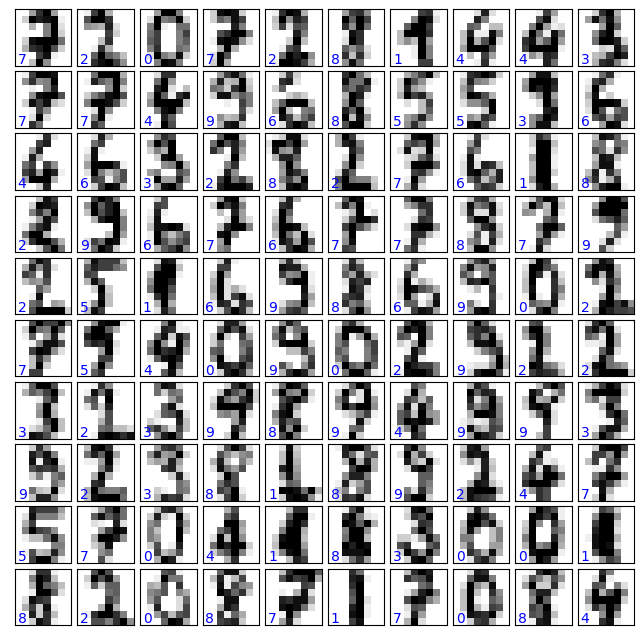

In [54]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(10,10,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)

for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i,:].reshape(8,8),cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_train[i]),transform=ax.transAxes,color='blue')
    ax.set_xticks([])
    ax.set_yticks([])